<a href="https://colab.research.google.com/github/bgsilva/bgsilva.github.io/blob/master/wine_dataset_2_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook a wine dataset will be analised 

Author: B.G. Silva (bgsilva.al@gmail.com)  
February, 19. 2021

## Importing libraries and the used wine dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_wine = pd.read_csv("https://raw.githubusercontent.com/thamysabrahao/datasets/master/sampe-wine-data.csv")

## General overview of the data



In [ ]:
print(df_wine.shape)
df_wine.head()

(25994, 14)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,50983,US,While the nose on this Chardonnay is decidedly...,Barrel Fermented,85,21.0,Virginia,Shenandoah Valley,NaN,Anna Lee C. Iijima,NaN,Veramar 2010 Barrel Fermented Chardonnay (Shen...,Chardonnay,Veramar
1,88366,France,A wine that brings out so many facets of Cheni...,Sec,90,17.0,Loire Valley,Vouvray,NaN,Roger Voss,@vossroger,Château Moncontour 2011 Sec (Vouvray),Chenin Blanc,Château Moncontour
2,38021,South Africa,The Kanonkop Pinotage does a beautiful job of ...,NaN,87,33.0,Simonsberg-Stellenbosch,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Kanonkop 2006 Pinotage (Simonsberg-Stellenbosch),Pinotage,Kanonkop
3,87257,US,"This is a rich, elaborate Cabernet Sauvignon. ...",The Cornerstone,90,125.0,California,Napa Valley,Napa,NaN,NaN,Cornerstone 2009 The Cornerstone Cabernet Sauv...,Cabernet Sauvignon,Cornerstone
4,110386,Germany,"While the nose is more mineral than fruit, a c...",Weissenberg,89,22.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Von Schleinitz 2015 Weissenberg Riesling (Mosel),Riesling,Von Schleinitz


In [ ]:
df_wine.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [ ]:
df_wine.isnull().sum()

Unnamed: 0                   0
country                     14
description                  0
designation               7564
points                       0
price                     1840
province                    14
region_1                  4264
region_2                 15906
taster_name               5278
taster_twitter_handle     6261
title                        0
variety                      0
winery                       0
dtype: int64

In [ ]:
df_wine.describe()

,Unnamed: 0,points,price
count,25994.000000,25994.000000,24154.000000
mean,65195.037355,88.449988,35.435580
std,37395.828023,3.037560,38.404373
min,4.000000,80.000000,4.000000
25%,32953.250000,86.000000,17.000000
50%,65331.500000,88.000000,25.000000
75%,97640.250000,91.000000,42.000000
max,129968.000000,100.000000,2013.000000


## Cleaning the data

In [ ]:
df_wine.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [ ]:
df_wine.drop(columns=['Unnamed: 0', 'taster_twitter_handle'], inplace=True)
df_wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery
0,US,While the nose on this Chardonnay is decidedly...,Barrel Fermented,85,21.0,Virginia,Shenandoah Valley,NaN,Anna Lee C. Iijima,Veramar 2010 Barrel Fermented Chardonnay (Shen...,Chardonnay,Veramar
1,France,A wine that brings out so many facets of Cheni...,Sec,90,17.0,Loire Valley,Vouvray,NaN,Roger Voss,Château Moncontour 2011 Sec (Vouvray),Chenin Blanc,Château Moncontour
2,South Africa,The Kanonkop Pinotage does a beautiful job of ...,NaN,87,33.0,Simonsberg-Stellenbosch,NaN,NaN,Susan Kostrzewa,Kanonkop 2006 Pinotage (Simonsberg-Stellenbosch),Pinotage,Kanonkop
3,US,"This is a rich, elaborate Cabernet Sauvignon. ...",The Cornerstone,90,125.0,California,Napa Valley,Napa,NaN,Cornerstone 2009 The Cornerstone Cabernet Sauv...,Cabernet Sauvignon,Cornerstone
4,Germany,"While the nose is more mineral than fruit, a c...",Weissenberg,89,22.0,Mosel,NaN,NaN,Anna Lee C. Iijima,Von Schleinitz 2015 Weissenberg Riesling (Mosel),Riesling,Von Schleinitz


## How many unique countries, wine varieties, and wineries does it has?
### Countries

In [ ]:

countries = df_wine['country'].dropna().unique()
countries_sum = len(countries)
print(f"Number of different countries: {countries_sum}")

Number of different countries: 38


In [ ]:
df_wine['country'].nunique()

38

In [ ]:
countries

array(['US', 'France', 'South Africa', 'Germany', 'Italy', 'Australia',
       'Argentina', 'Chile', 'New Zealand', 'Portugal', 'Austria',
       'Israel', 'Spain', 'Bulgaria', 'Mexico', 'Hungary', 'Romania',
       'Canada', 'Slovenia', 'England', 'Morocco', 'Turkey', 'Cyprus',
       'Greece', 'Croatia', 'Lebanon', 'Brazil', 'Georgia', 'Uruguay',
       'Moldova', nan, 'Macedonia', 'Switzerland',
       'Bosnia and Herzegovina', 'Peru', 'Luxembourg', 'Czech Republic',
       'Ukraine', 'Serbia'], dtype=object)

### Wine varieties

In [ ]:
varieties = df_wine['variety'].unique()
varieties_sum = len(df_wine['variety'].unique())
print(f"Number of different varieties: {varieties_sum}")

Number of different varieties: 467


### Wineries

In [ ]:
wineries = df_wine['winery'].unique()
wineries_sum = len(df_wine['winery'].unique())
print(f"Number of different wineries: {wineries_sum}")

Number of different wineries: 9366



## Which countries, wine varieties, and wineries are the most frequent?
### Top 10 countries


In [ ]:
top_countries = df_wine['country'].value_counts()
top_countries.head(10)

US           10893
France        4380
Italy         3895
Spain         1375
Portugal      1158
Chile          884
Argentina      776
Austria        682
Australia      443
Germany        414
Name: country, dtype: int64

### Top 10 wine varieties

In [ ]:
top_varieties = df_wine['variety'].value_counts()
top_varieties.head(10)

Pinot Noir                  2646
Chardonnay                  2238
Cabernet Sauvignon          1923
Red Blend                   1733
Bordeaux-style Red Blend    1401
Riesling                    1062
Sauvignon Blanc              935
Syrah                        841
Rosé                         726
Merlot                       602
Name: variety, dtype: int64

### Top 10 wineries

In [ ]:
top_wineries = df_wine['winery'].value_counts()
top_wineries.head(10)

Testarossa               48
DFJ Vinhos               45
Williams Selyem          45
Concha y Toro            43
Wines & Winemakers       42
Georges Duboeuf          41
Louis Latour             35
Chateau Ste. Michelle    34
Gary Farrell             26
Casa Santos Lima         26
Name: winery, dtype: int64

## Is there any relation between the wine price and its score?

In [ ]:
df_wine.corr()

,points,price
points,1.00000,0.44598
price,0.44598,1.00000


There is a weak/moderate uphill (positive) linear relationship (It will better be visualized with the graphics shown further ahead)

## Mean/median wine price and score by winery and country 
### Mean/median wine price and score by country

In [ ]:
cp_mean = df_wine.groupby('country')['price'].mean().sort_values(ascending=False)
cp_median = df_wine.groupby('country')['price'].median().sort_values(ascending=False)
print(f"Mean Price per:\n {cp_mean}, \n\n Median of Price per:\n {cp_median}")

Mean Price per:
 country
England                   55.562500
Germany                   41.747525
Italy                     40.622883
France                    39.647964
Switzerland               38.000000
US                        36.957641
Australia                 34.235698
Hungary                   34.235294
Canada                    32.944444
Israel                    32.346939
Austria                   31.104712
Spain                     28.501475
Romania                   28.250000
Portugal                  26.856851
Mexico                    26.600000
New Zealand               26.519231
Luxembourg                26.000000
Lebanon                   26.000000
Croatia                   25.500000
Czech Republic            25.000000
South Africa              24.209125
Argentina                 23.634590
Greece                    23.090000
Chile                     22.289171
Serbia                    22.000000
Turkey                    21.857143
Morocco                   21.000000
Slo

## Mean/median wine price and score by winery

In [ ]:
cp_mean = df_wine.groupby('winery')['price'].mean().sort_values(ascending=False).head(10)
cp_median = df_wine.groupby('winery')['price'].median().sort_values(ascending=False).head(10)
print(f"Mean Price per winery:\n {cp_mean}, \n\n Median Price per winery:\n {cp_median}")

Mean Price per winery:
 winery
Château Lafite Rothschild        570.0
Château Ausone                   530.0
Blair                            527.0
Salon                            520.0
Domaine Perrot-Minot             500.0
Dal Forno Romano                 500.0
Château Cheval Blanc             500.0
Château La Mission Haut-Brion    484.5
Biondi Santi                     405.0
Yao Ming                         397.5
Name: price, dtype: float64, 

 Median Price per winery:
 winery
Château Lafite Rothschild        570.0
Château Ausone                   530.0
Salon                            520.0
Château Cheval Blanc             500.0
Dal Forno Romano                 500.0
Domaine Perrot-Minot             500.0
Château La Mission Haut-Brion    484.5
Château Margaux                  450.0
Yao Ming                         397.5
Château Latour                   337.5
Name: price, dtype: float64


## Wine score histogram 


Text(0, 0.5, 'Frequency')

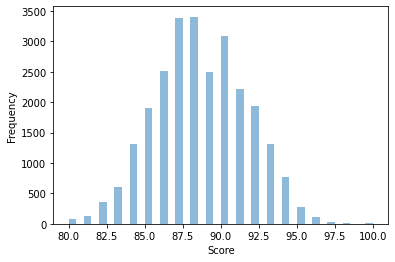

In [ ]:
df_wine['points'].plot.hist(bins=40, alpha=0.5)
#plt.title('Distribuição percentual de clientes por país')
plt.xlabel('Score')
plt.ylabel('Frequency')

## Wine price boxplot

Text(0, 0.5, 'Frequency')

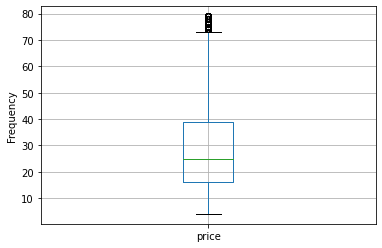

In [ ]:
df_wine[df_wine.price < 80].boxplot(column=['price'])
#plt.title('Distribuição percentual de clientes por país')
#plt.xlabel('País do cliente')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

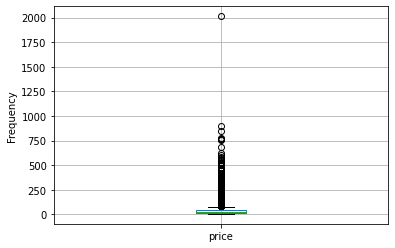

In [ ]:
df_wine.boxplot(column=['price'])
#plt.title('Distribuição percentual de clientes por país')
#plt.xlabel('País do cliente')
plt.ylabel('Frequency')

## Wordcloud


In [ ]:
import numpy as np
#from os import path
from PIL import Image
from wordcloud import WordCloud

### From first description

while the nose on this chardonnay is decidedly savory, with notes of cooked apples and buttery cheese rinds, the palate is surprisingly feminine, with pretty orange-blossom and apple jelly notes. opulent and fruity, yet refreshingly-balanced in alcohol and acidity.


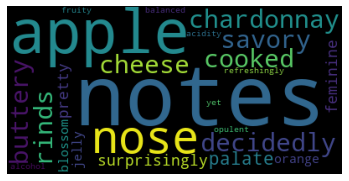

In [ ]:
df_wine['description'] = df_wine['description'].str.lower()
text = df_wine.description[0]
print(text)
wordcloud = WordCloud().generate(text)
# para mostrar a núvem de palavras
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### From all descriptions

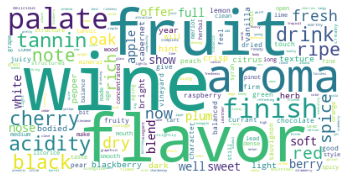

In [ ]:
# melhorando nossa núvem de palavras
all_text = " ".join(description for description in df_wine.description)
wordcloud = WordCloud(collocations=False, background_color='white').generate(all_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

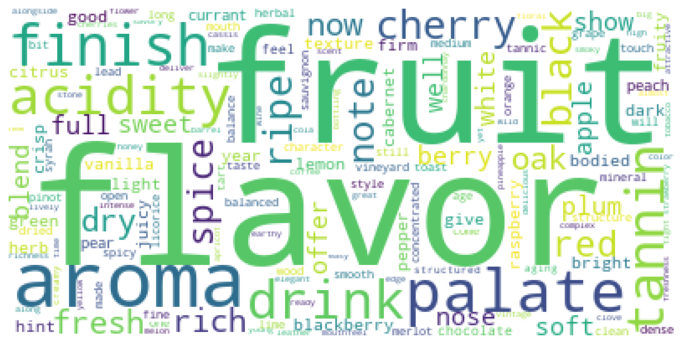

In [ ]:
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
# podemos adicionar novas palavras nas stopwords
stopwords.update(["wine"])
#stopwords.remove("wine")
wordcloud = WordCloud(collocations=False, background_color='white', stopwords=stopwords).generate(all_text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## K-Means basics

### Clustering

Clustering is the process of dividing the entire data into groups (also known as clusters) based on the patterns in the data.

In clustering, we do not have a target to predict. We look at the data and then try to club similar observations and form different groups. Hence it is an unsupervised learning problem.

### Applications of Clustering in Real-World Scenarios

#### Customer Segmentation  

Telecom, e-commerce, sports, advertising, sales, etc.

#### Document Clustering

This is another common application of clustering. Let’s say you have multiple documents and you need to cluster similar documents together. Clustering helps us group these documents such that similar documents are in the same clusters.

#### Image Segmentation

We can also use clustering to perform image segmentation. Here, we try to club similar pixels in the image together. We can apply clustering to create clusters having similar pixels in the same group.


There is an algorithm that tries to minimize the distance of the points in a cluster with their centroid – the k-means clustering technique.
The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid.

### Introduction to K-Means Clustering

* Step 1: Choose the number of clusters k
 
* Step 2: Select k random points from the data as centroids
 
![Step2](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/08/Screenshot-from-2019-08-09-12-23-55.png)

* Step 3: Assign all the points to the closest cluster centroid

![Step3](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/08/Screenshot-from-2019-08-09-12-24-35.png)
 
* Step 4: Recompute the centroids of newly formed clusters

![Step4](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/08/Screenshot-from-2019-08-09-12-26-59.png)
 
* Step 5: Repeat steps 3 and 4

![Step5](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/08/Screenshot-from-2019-08-09-12-28-14.png)

The step of computing the centroid and assigning all the points to the cluster based on their distance from the centroid is a single iteration. But wait – when should we stop this process? It can’t run till eternity, right?

### Stopping Criteria for K-Means Clustering

There are essentially three stopping criteria that can be adopted to stop the K-means algorithm:
Centroids of newly formed clusters do not change
Points remain in the same cluster
Maximum number of iterations are reached



From: [The Most Comprehensive Guide to K-Means Clustering You’ll Ever Need](https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/)

## Application of a simple K-Means model for the wine data set

In [ ]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [ ]:
df_wine = pd.read_csv("https://raw.githubusercontent.com/thamysabrahao/datasets/master/sampe-wine-data.csv")
df_wine.head(4)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,50983,US,While the nose on this Chardonnay is decidedly...,Barrel Fermented,85,21.0,Virginia,Shenandoah Valley,NaN,Anna Lee C. Iijima,NaN,Veramar 2010 Barrel Fermented Chardonnay (Shen...,Chardonnay,Veramar
1,88366,France,A wine that brings out so many facets of Cheni...,Sec,90,17.0,Loire Valley,Vouvray,NaN,Roger Voss,@vossroger,Château Moncontour 2011 Sec (Vouvray),Chenin Blanc,Château Moncontour
2,38021,South Africa,The Kanonkop Pinotage does a beautiful job of ...,NaN,87,33.0,Simonsberg-Stellenbosch,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Kanonkop 2006 Pinotage (Simonsberg-Stellenbosch),Pinotage,Kanonkop
3,87257,US,"This is a rich, elaborate Cabernet Sauvignon. ...",The Cornerstone,90,125.0,California,Napa Valley,Napa,NaN,NaN,Cornerstone 2009 The Cornerstone Cabernet Sauv...,Cabernet Sauvignon,Cornerstone


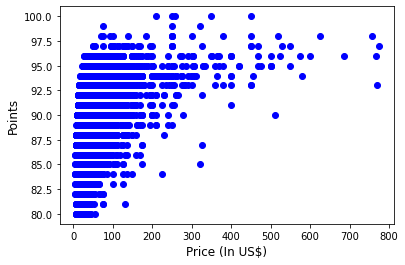

In [ ]:
# Selecting 'points' and 'price' columns 
X = df_wine[["points","price"]]
# Dropping outliers
X = X[X.price < 800]
#Visualise data points
plt.scatter(X["price"], X["points"],c='blue')
plt.ylabel('Points', size=12)
plt.xlabel('Price (In US$)', size=12)
plt.show()

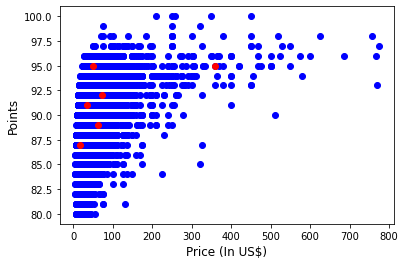

In [ ]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=6

# Select random observation as centroids
Centroids = (X.sample(n=K, random_state=50))
plt.scatter(X["price"], X["points"],c='blue')
plt.scatter(Centroids["price"],Centroids["points"],c='red')
plt.ylabel('Points', size=12)
plt.xlabel('Price (In US$)', size=12)
plt.show()

In [ ]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["points"]-row_d["points"])**2
            d2=(row_c["price"]-row_d["price"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["price","points"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['price'] - Centroids['price']).sum() + (Centroids_new['points'] - Centroids['points']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["price","points"]]

17.16000387329166
20.241247030689177
14.989182186830597
15.259680806829468
34.17100642996864
24.32224304729841
20.22041560476899
11.998776293773528
11.585908047047294
0.8542751723420956
0.21676389238633575
0.22136348611880408
0.23651186256839907
0.5923246033397973
3.460527916799304
2.6899663277771673
10.521094079349224
15.44973563353214
23.02275609897842
9.786873541214296
10.391902428445581
15.305122614332994
10.597839858950978
1.9435782221100304
0.40183911957441865
0.029004699723323313
0.0


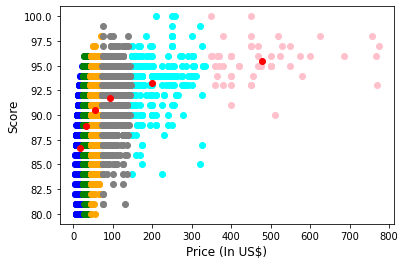

In [ ]:
color=['blue','green','cyan', 'orange', 'pink', 'grey']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["price"],data["points"],c=color[k])
plt.scatter(Centroids["price"],Centroids["points"],c='red')
plt.ylabel('Score', size=12)
plt.xlabel('Price (In US$)', size=12)
plt.show()

## K-Means ++

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
df_wine = pd.read_csv("https://raw.githubusercontent.com/thamysabrahao/datasets/master/sampe-wine-data.csv")
df_wine.head(4)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,50983,US,While the nose on this Chardonnay is decidedly...,Barrel Fermented,85,21.0,Virginia,Shenandoah Valley,NaN,Anna Lee C. Iijima,NaN,Veramar 2010 Barrel Fermented Chardonnay (Shen...,Chardonnay,Veramar
1,88366,France,A wine that brings out so many facets of Cheni...,Sec,90,17.0,Loire Valley,Vouvray,NaN,Roger Voss,@vossroger,Château Moncontour 2011 Sec (Vouvray),Chenin Blanc,Château Moncontour
2,38021,South Africa,The Kanonkop Pinotage does a beautiful job of ...,NaN,87,33.0,Simonsberg-Stellenbosch,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Kanonkop 2006 Pinotage (Simonsberg-Stellenbosch),Pinotage,Kanonkop
3,87257,US,"This is a rich, elaborate Cabernet Sauvignon. ...",The Cornerstone,90,125.0,California,Napa Valley,Napa,NaN,NaN,Cornerstone 2009 The Cornerstone Cabernet Sauv...,Cabernet Sauvignon,Cornerstone


In [3]:
df_wine = df_wine[["points","price"]]
# Dropping outliers
df_wine = df_wine[df_wine.price < 800]
# Dropping nan
df_wine = df_wine.dropna()
df_wine.describe()

,points,price
count,24151.000000,24151.000000
mean,88.425490,35.284170
std,3.044675,35.421659
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,775.000000


In [4]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_wine)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1
count,2.415100e+04,2.415100e+04
mean,1.678781e-15,-8.737070e-17
std,1.000021e+00,1.000021e+00
min,-2.767344e+00,-8.832115e-01
25%,-7.966497e-01,-5.161969e-01
50%,-1.397517e-01,-2.903417e-01
75%,8.455954e-01,1.896006e-01
max,3.801637e+00,2.088358e+01


Inertia cluster #1: 48302.000000000015
Inertia cluster #2: 28292.628890624386
Inertia cluster #3: 18494.236880727007
Inertia cluster #4: 13367.026635373779
Inertia cluster #5: 10430.98895086944
Inertia cluster #6: 8601.695547513862
Inertia cluster #7: 7288.591055161214
Inertia cluster #8: 6258.175799478266
Inertia cluster #9: 5541.25559940082
Inertia cluster #10: 4915.3304586960285
Inertia cluster #11: 4498.18917743185
Inertia cluster #12: 4104.11961861216
Inertia cluster #13: 3755.7436506768436
Inertia cluster #14: 3542.830771187706
Inertia cluster #15: 3238.9139006135233
Inertia cluster #16: 3048.5916415335932
Inertia cluster #17: 2861.5702268024697
Inertia cluster #18: 2717.7063398869577
Inertia cluster #19: 2604.574649360729


Text(0, 0.5, 'Inertia')

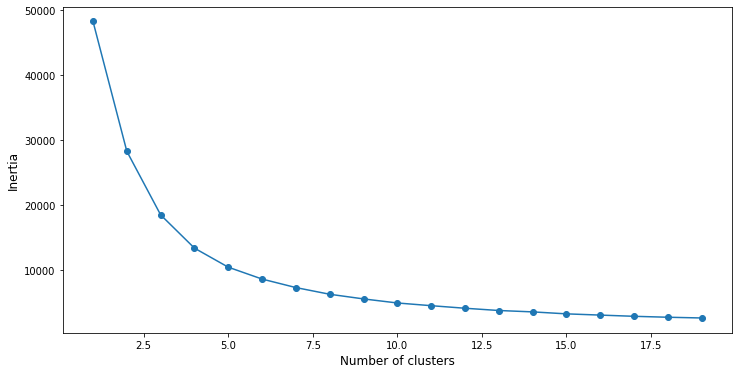

In [5]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++', random_state=50)
    kmeans.fit(data_scaled)
    print(f"Inertia cluster #{cluster}: {kmeans.inertia_}")
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters', size=12)
plt.ylabel('Inertia', size=12)

In [6]:
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++', random_state=50)
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [7]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
n_elem_cluster = frame['cluster'].value_counts()
for i, v in n_elem_cluster.iteritems():
    print('Cluster: ', i, ' - Number of elements: ', v)

Cluster:  4  - Number of elements:  10004
Cluster:  0  - Number of elements:  6401
Cluster:  3  - Number of elements:  6125
Cluster:  1  - Number of elements:  1499
Cluster:  2  - Number of elements:  122


## Scaled data plot

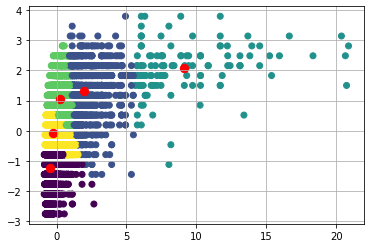

In [8]:
color=['blue','green','cyan', 'orange', 'pink', 'grey']
dataset = data_scaled
plt.scatter(dataset[:,1], dataset[:,0], c = pred) #posicionamento dos eixos x e y
#plt.xlim(-75, -30) #range do eixo x
#plt.ylim(-50, 10) #range do eixo y
plt.grid() #função que desenha a grade no nosso gráfico
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], s = 70, c = 'red') #posição de cada centroide no gráfico
plt.show()

## Clustered data plot

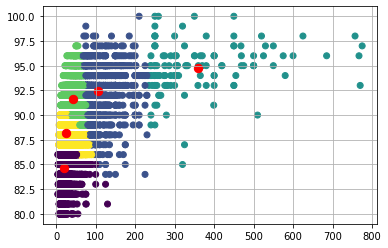

In [9]:
color=['blue','green','cyan', 'orange', 'pink', 'grey']
dataset = scaler.inverse_transform(data_scaled)
cluster_centers_ = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(dataset[:,1], dataset[:,0], c = pred) #posicionamento dos eixos x e y
#plt.xlim(-75, -30) #range do eixo x
#plt.ylim(-50, 10) #range do eixo y
plt.grid() #função que desenha a grade no nosso gráfico
plt.scatter(cluster_centers_[:,1], cluster_centers_[:,0], s = 70, c = 'red') #posição de cada centroide no gráfico
plt.show()

## References


[In Depth: k-Means Clustering](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)

[The Most Comprehensive Guide to K-Means Clustering You’ll Ever Need](https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/)

[K-means: o que é, como funciona, aplicações e exemplo em Python](https://medium.com/programadores-ajudando-programadores/k-means-o-que-%C3%A9-como-funciona-aplica%C3%A7%C3%B5es-e-exemplo-em-python-6021df6e2572)

[K-Means Clustering with Scikit-learn](https://medium.com/data-science-365/k-means-clustering-with-scikit-learn-e2af706450e4)

[K-Means Clustering with Scikit-learn](https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c)

[Clustering Visualizers](https://www.scikit-yb.org/en/latest/api/cluster/index.html)

[Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook)

[Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/)